# Inference using the trained model

Checkout "train_and_visualize_prototype.ipynb" for the training details. You can use this notebook to make inference using the trained model on custom images.

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
# Path to your saved weights
weights_path = "../runs/detect/train/weights/best.pt"  # Replace with the path to your trained model weights

# Load the model
model = YOLO(weights_path)
print("Model loaded successfully!")


Model loaded successfully!


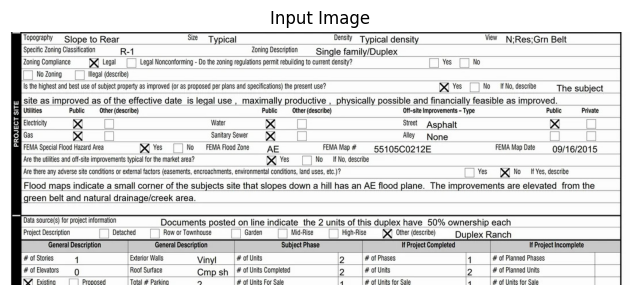

In [3]:
# Path to the image for inference - replace as necessary
image_path = "../datasets/checkboxes/train/images/d2.jpg"  # Replace with the path to your test image

# Load and visualize the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Input Image")
plt.show()


In [4]:
# Perform inference
results = model(image_path)  # Run the image through the model


image 1/1 /home/jere/repo/checkbox_detector_yolo/../datasets/checkboxes/train/images/d2.jpg: 288x640 23 empty_checkboxs, 12 filled_checkboxs, 251.7ms
Speed: 1.7ms preprocess, 251.7ms inference, 1.1ms postprocess per image at shape (1, 3, 288, 640)


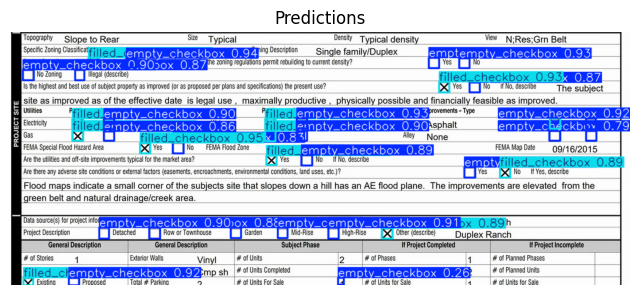

In [5]:
# Visualize predictions on the image
results_image = results[0].plot()  # Automatically draws predictions on the image

# Show the image with predictions
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis("off")
plt.title("Predictions")
plt.show()

In [8]:
challenge_img_path = "../datasets/checkboxes/val/images/real.jpg"
results = model.predict(challenge_img_path, save=True, device=[0], imgsz=640, conf=0.2)


image 1/1 /home/jere/repo/checkbox_detector_yolo/../datasets/checkboxes/val/images/real.jpg: 352x640 25 empty_checkboxs, 22 filled_checkboxs, 274.1ms
Speed: 2.1ms preprocess, 274.1ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict


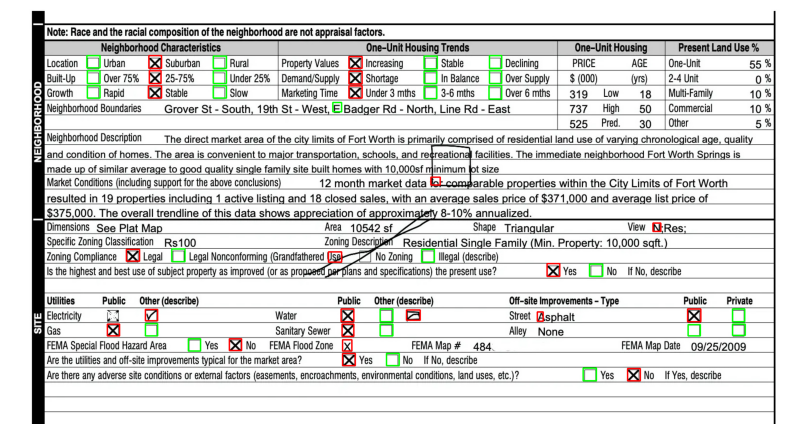

In [9]:
class_colors = {
    0: (0, 255, 0),  # Red for class FILLED CHECKBOX
    1: (255, 0, 0),  # Green for class UNFILLED CHECKBOX
}

image = cv2.imread(challenge_img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract bounding boxes
boxes = results[0].boxes.xyxy  # Get bounding box coordinates (x1, y1, x2, y2)
scores = results[0].boxes.conf  # Confidence scores (optional)
class_ids = results[0].boxes.cls  # Class IDs (0, 1, etc.)

for box, cls in zip(boxes, class_ids):
    x1, y1, x2, y2 = map(int, box)  # Convert to integers
    color = class_colors.get(int(cls), (255, 255, 255))  # Default to white if class not found
    cv2.rectangle(image, (x1, y1), (x2, y2), color=color, thickness=2)  # Draw box

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()